## Visualizing Text Data Using Word Clouds

Earlier in the course, we used text analytics as a predictive tool, using word frequencies as independent variables in our models. However, sometimes our goal is to understand commonly occurring topics in text data instead of to predict the value of some dependent variable. In such cases, word clouds can be a visually appealing way to display the most frequent words in a body of text.

A word cloud arranges the most common words in some text, using size to indicate the frequency of a word. For instance, this is a word cloud for the complete works of Shakespeare, removing English stopwords:

Shakespeare word cloud

While we could generate word clouds using free generators available on the Internet, we will have more flexibility and control over the process if we do so in R. We will visualize the text of tweets about Apple, a dataset we used earlier in the course. As a reminder, this dataset (which can be downloaded from tweets.csv) has the following variables:

**Tweet** -- the text of the tweet

**Avg** -- the sentiment of the tweet, as assigned by users of Amazon Mechanical Turk. The score ranges on a scale from -2 to 2, where 2 means highly positive sentiment, -2 means highly negative sentiment, and 0 means neutral sentiment.

### Preparing the Data

In [1]:
tweets = read.csv('./dataset/tweets.csv', stringsAsFactors=FALSE)

In [2]:
str(tweets)

'data.frame':	1181 obs. of  2 variables:
 $ Tweet: chr  "I have to say, Apple has by far the best customer care service I have ever received! @Apple @AppStore" "iOS 7 is so fricking smooth & beautiful!! #ThanxApple @Apple" "LOVE U @APPLE" "Thank you @apple, loving my new iPhone 5S!!!!!  #apple #iphone5S pic.twitter.com/XmHJCU4pcb" ...
 $ Avg  : num  2 2 1.8 1.8 1.8 1.8 1.8 1.6 1.6 1.6 ...


In [3]:
library("tm")
library("SnowballC")

Loading required package: NLP



In [4]:
corpus = VCorpus(VectorSource(tweets$Tweet))

In [5]:
corpus = tm_map(corpus, content_transformer(tolower))

In [6]:
corpus = tm_map(corpus, removePunctuation)

In [7]:
corpus = tm_map(corpus, removeWords, stopwords("english"))

In [8]:
dtm = DocumentTermMatrix(corpus)

In [9]:
allTweets = as.data.frame(as.matrix(dtm))

In [11]:
str(allTweets)

'data.frame':	1181 obs. of  3780 variables:
 $ 000                                                                                                                : num  0 0 0 0 0 0 0 0 0 0 ...
 $ 075                                                                                                                : num  0 0 0 0 0 0 0 0 0 0 ...
 $ 0909                                                                                                               : num  0 0 0 0 0 0 0 0 0 0 ...
 $ 0910                                                                                                               : num  0 0 0 0 0 0 0 0 0 0 ...
 $ 099                                                                                                                : num  0 0 0 0 0 0 0 0 0 0 ...
 $ 100                                                                                                                : num  0 0 0 0 0 0 0 0 0 0 ...
 $ 100m                                                       

### Building a Word Cloud

In [12]:
library("wordcloud")

Loading required package: RColorBrewer



In [13]:
colnames(allTweets)

[1] "000"                                                                                                                
   [2] "075"                                                                                                                
   [3] "0909"                                                                                                               
   [4] "0910"                                                                                                               
   [5] "099"                                                                                                                
   [6] "100"                                                                                                                
   [7] "100m"                                                                                                               
   [8] "1085"                                                                                                               
   [9] "10min"                                                                                                              
  [10] "110"                                                                                                                
  [11] "13apple"                                                                                                            
  [12] "13th"                                                                                                               
  [13] "1415"                                                                                                               
  [14] "16gb"                                                                                                               
  [15] "16gbs"                                                                                                              
  [16] "180"                                                                                                                
  [17] "18092013"                                                                                                           
  [18] "18th"                                                                                                               
  [19] "199"                                                                                                                
  [20] "1am"                                                                                                                
  [21] "1jazzyjeff"                                                                                                         
  [22] "1st"                                                                                                                
  [23] "200"                                                                                                                
  [24] "2000ad"                                                                                                             
  [25] "2001"                                                                                                               
  [26] "2002"                                                                                                               
  [27] "2004"                                                                                                               
  [28] "2005"                                                                                                               
  [29] "2011with"                                                                                                           
  [30] "2013"                                                                                                               
  [31] "2014"                                                                                                               
  [32] "20th"                                                                                                               
  [

In [16]:
colSums(allTweets)

000 
                                                                                                                  1 
                                                                                                                075 
                                                                                                                  3 
                                                                                                               0909 
                                                                                                                  1 
                                                                                                               0910 
                                                                                                                  1 
                                                                                                                099 
                                                                                                                  1 
                                                                                                                100 
                                                                                                                  2 
                                                                                                               100m 
                                                                                                                  1 
                                                                                                               1085 
                                                                                                                  3 
                                                                                                              10min 
                                                                                                                  1 
                                                                                                                110 
                                                                                                                  1 
                                                                                                            13apple 
                                                                                                                  1 
                                                                                                               13th 
                                                                                                                  1 
                                                                                                               1415 
                                                                                                                  1 
                                                                                                               16gb 
                                                                                                                  1 
                                                                                                              16gbs 
                                                                                                                  1 
                                                                                                                180 
                                                                                                                  1 
                                                                                                           18092013 
                                                                                                                  1 
                                                                                                               18th 
                 

Use allTweets to build a word cloud. Make sure to check out the help page for wordcloud if you are not sure how to do this.

Because we are plotting a large number of words, you might get warnings that some of the words could not be fit on the page and were therefore not plotted -- this is especially likely if you are using a smaller screen. You can address these warnings by plotting the words smaller. From ?wordcloud, we can see that the "scale" parameter controls the sizes of the plotted words. By default, the sizes range from 4 for the most frequent words to 0.5 for the least frequent, as denoted by the parameter "scale=c(4, 0.5)". We could obtain a much smaller plot with, for instance, parameter "scale=c(2, 0.25)".

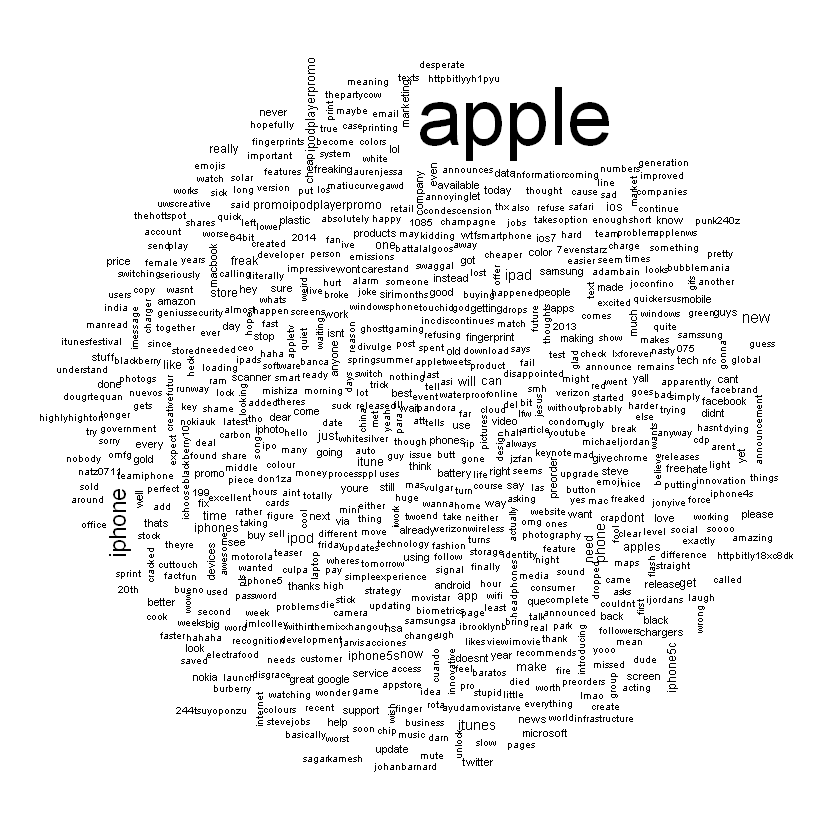

In [19]:
wordcloud(colnames(allTweets), colSums(allTweets), scale=c(4, 0.5))

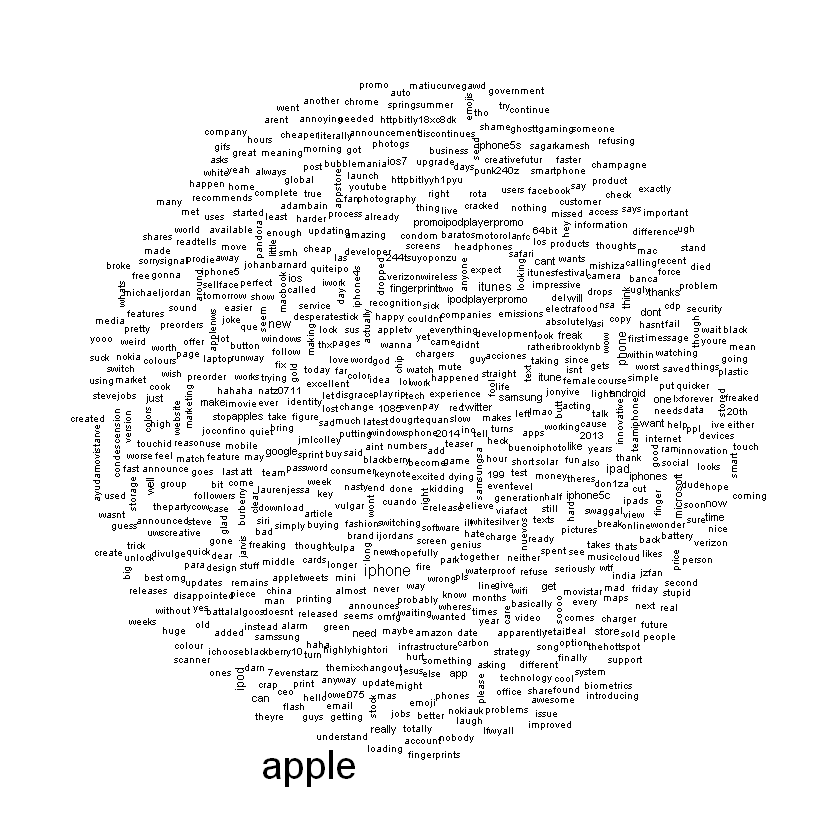

In [20]:
wordcloud(colnames(allTweets), colSums(allTweets), scale=c(2, 0.5))

In the previous subproblem, we noted that there is one word with a much higher frequency than the other words. Repeat the steps to load and pre-process the corpus, this time removing the most frequent word in addition to all elements of stopwords("english") in the call to tm_map with removeWords. For a refresher on how to remove this additional word, see the Twitter text analytics lecture.

Replace allTweets with the document-term matrix of this new corpus -- we will use this updated corpus for the remainder of the assignment.

Create a word cloud with the updated corpus.

In [ ]:
corpus = VCorpus(VectorSource(tweets$Tweet))
corpus = tm_map(corpus, content_transformer(tolower))
corpus = tm_map(corpus, removePunctuation)
corpus = tm_map(corpus, removeWords, stopwords("english"))